# **OSMnx Test**
##### In this project we test OSMnx python package instructions.

In [ ]:
# if using colab, install dependencies by un-commenting the line below
#!uv pip install --system --quiet osmnx[all]

# or this command
#!pip install osmnx

In [1]:
import networkx as nx
import osmnx as ox

ox.__version__

'2.0.5'

### Working with street networks

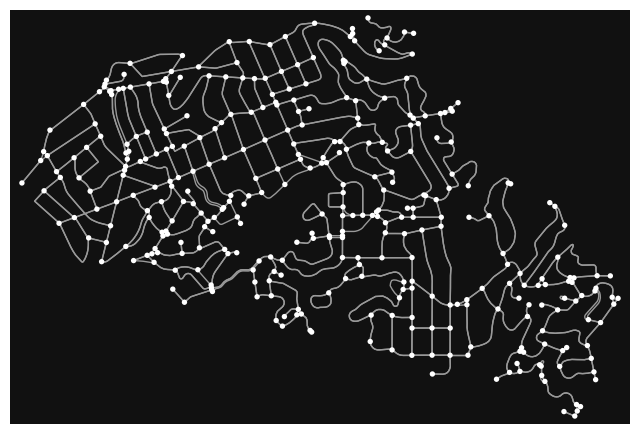

In [ ]:
# <1>
import osmnx as ox

# download/model a street network for some city then visualize it
G = ox.graph.graph_from_place("Piedmont, California, USA", network_type="drive")
fig, ax = ox.plot.plot_graph(G)

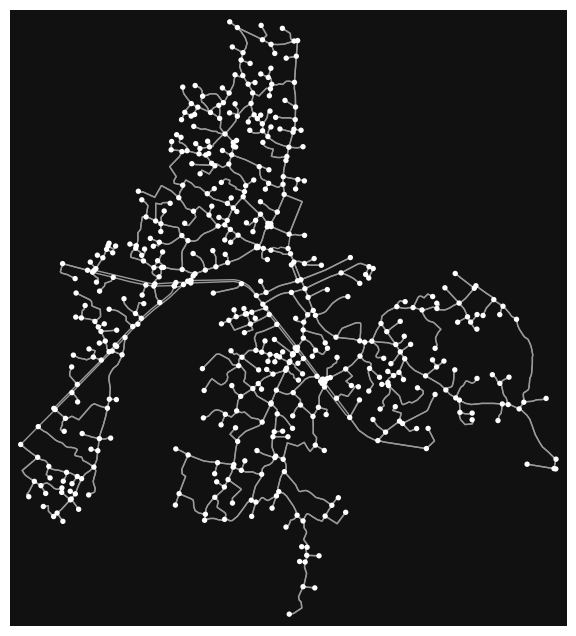

In [ ]:
# <1>
import osmnx as ox

# download/model a street network for some city then visualize it
G = ox.graph.graph_from_place("لشت نشاء، گیلان، ایران", network_type="drive")
fig, ax = ox.plot.plot_graph(G)

In [ ]:
# <2>
import osmnx as ox
G = ox.graph.graph_from_place("Piedmont, California, USA", network_type="drive")

# you can convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.convert.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,street_count,highway,junction,geometry
osmid,,,,,,
53017091,37.826250,-122.247604,3,NaN,NaN,POINT (-122.2476 37.82625)
53018397,37.824220,-122.247198,3,stop,NaN,POINT (-122.2472 37.82422)
53018399,37.824900,-122.246113,3,NaN,NaN,POINT (-122.24611 37.8249)
53018402,37.825406,-122.245338,3,NaN,NaN,POINT (-122.24534 37.82541)
53018404,37.825948,-122.244467,3,NaN,NaN,POINT (-122.24447 37.82595)


In [17]:
# <2>
gdf_edges.head()

osmid      highway          name  oneway reversed  \
u        v        key                                                          
53017091 53064327 0      6345781  residential   Rose Avenue   False    False   
         53075599 0      6345781  residential   Rose Avenue   False     True   
53018397 53018399 0      6327298  residential   Lake Avenue   False    False   
         53018411 0    196739937     tertiary  Linda Avenue   False    False   
         53097980 0    196739937     tertiary  Linda Avenue   False     True   

                           length  \
u        v        key               
53017091 53064327 0    230.124412   
         53075599 0    122.234915   
53018397 53018399 0    121.647438   
         53018411 0     37.593760   
         53097980 0    100.205124   

                                                                geometry  \
u        v        key                                                      
53017091 53064327 0    LINESTRING (-122.2476 37.82625, -122.2475 37.8...   
         53075599 0    LINESTRING (-122.2476 37.82625, -122.24771 37....   
53018397 53018399 0    LINESTRING (-122.2472 37.82422, -122.24712 37....   
         53018411 0    LINESTRING (-122.2472 37.82422, -122.24713 37....   
         53097980 0    LINESTRING (-122.2472 37.82422, -122.24772 37....   

                      lanes maxspeed bridge junction  
u        v        key                                 
53017091 53064327 0     NaN      NaN    NaN      NaN  
         53075599 0     NaN      NaN    NaN      NaN  
53018397 53018399 0     NaN      NaN    NaN      NaN  
         53018411 0     NaN      NaN    NaN      NaN  
         53097980 0     NaN      NaN    NaN      NaN

In [18]:
# <3>
import osmnx as ox
G = ox.graph.graph_from_place("Piedmont, California, USA", network_type="drive")

# save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
ox.io.save_graph_geopackage(G, filepath="../data/mynetwork.gpkg")
ox.io.save_graphml(G, filepath="../data/mynetwork.graphml")